# Task 1 and 2:
<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Data Parsing, Cleansing and Integration</strong></h3>

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used:
* pandas
* re
* numpy
* xml.etree.ElementTree
* missingno
* seaborn
* matplotlib

## Introduction

The dataset combines jobs, and related information on those positions gathered from various job-hunting websites. Data pre-processing analysis on job advertisements is becoming more crucial and advantageous for job-search websites since it allows for enhancements to the user experience of searching.
I will discover and resolve problems in data integration and manage a sizable collection of records related to job advertisements that are kept in XML format and have unknown data quality concerns.

## Identify conflict

### Schema level conflicts:
+ Typos and spelling mistakes
+ Irregularities, e.g., abnormal data values and data formats
+ Violations of the Integrity constraint.
+ Outliers
+ Duplications
+ Missing values
+ Inconsistency, e.g., inhomogeneity in values and types in representing the same data

### Data level conflicts:
+ Duplications

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
# inline installation
import sys
!{sys.executable} -m pip install missingno

import pandas as pd
import xml.etree.ElementTree as ET
import numpy as np
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# check the version of the main packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.23.1
Pandas version:  1.4.3
Python 3.10.4


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 1. Parsing Data</strong></h3>

### 1.1. Examining and loading the XML data
Examine **dataset1.xml** to determine its content and structure

XML document form a tree structure that starts at "the root" (root element0 and branches to "the leaves" (child elements).

In [3]:
# read xml file
tree = ET.parse('dataset1.xml')
root = tree.getroot()

# print the root tag and its children
print(f'Root tag of the whole XML file: {root.tag}\n')
print(f'The first example attributes of {root[0].tag} : {root[0].attrib}\n')
print(f'The first example attributes of {root[0][0]} is {root[0][0].attrib}\n')
print(f'The first example text content of {root[0][0][0].tag} : {root[0][0][0].text}\n\n')

# # example of child index out of range
# print(f'The first example attributes of {root[0][0][0][0].tag} : {root[0][0][0][0].text}')

Root tag of the whole XML file: Job_Listings

The first example attributes of Source : {'Name': 'caterer.com'}

The first example attributes of <Element 'JobAd' at 0x7f85d24e0310> is {'OpenDate': '20120822T000000', 'CloseDate': '20121021T000000'}

The first example text content of Id : 67378957




### --------> OBSERVATION

+ The root of the XML file is `Job_Listings`.

+ All elements in the XML file above either have attributes (OpenDate = "20120822T000000") or text contents (67378957)

+ `Id`, `Title`, `Location`, `Company`, `ContractType`, `ContractTime`, `Category`, and `Salary` have text content because they contain text (like 35000).

+ `Job_Listings`, `Source` and `JobAd` have element contents, because they contain elements.

+ `Source` and `JobAd` have an attribute (e.g. Name = "caterer.com").

+ The 2 attributes of element `JobAd` is `OpenDate` and `CloseDate` are in the format of YYYYMMDDThhmmss. Y
indicates year, M indicates month, D indicates day, T is just a letter (means time), h indicates hour (24-hour
format), m indicates minute, and s indicates second. For above example, "20120822T000000" means 00:00:00 22nd August 2012

![Tree map for XML file](tree_map_XML.png)

In [4]:
# initialise a dictionary to store all the fields as empty lists
dataDict = {'Id': [], 'Title': [], 'Location': [], 'Company': [], 'ContractType': [], 'ContractTime': [],
            'Category': [], 'Salary': [], 'OpenDate': [], 'CloseDate': [], 'SourceName': []}

# loop through each element in the XML and append to the dictionary
for source in tree.findall('Source'):
    for child1 in source: #iter over job ad
        dataDict['SourceName'].append(source.attrib['Name']) if child1 is not None else None
        dataDict['OpenDate'].append(child1.attrib['OpenDate']) if child1 is not None else None
        dataDict['CloseDate'].append(child1.attrib['CloseDate']) if child1 is not None else None
        for child in child1:
            dataDict[child.tag].append(child.text) if child is not None else None

# impute None to unequal length of fields
for key in dataDict:
    if len(dataDict[key]) != len(dataDict['Id']):
        dataDict[key] = np.append(dataDict[key], [None]*(len(dataDict['Id']) - len(dataDict[key])))

# check the length of each key in the dictionary
# to ensure they all have equal length to convert into a dataframe
for i,keys in dataDict.items():
    print(len(dataDict[i]), i)

50753 Id
50753 Title
50753 Location
50753 Company
50753 ContractType
50753 ContractTime
50753 Category
50753 Salary
50753 OpenDate
50753 CloseDate
50753 SourceName


### 1.2 Parsing data into the required format

In [5]:
# parse data into dataframe. columns/attributes: Id, Title, Location, Company, ContractType, ContractTime, Category, Salary, OpenDate, CloseDate and SourceName.

df = pd.DataFrame(dataDict)

# rename the columns
df.rename(columns = {'Id':'Id','Title':'Title','Location':'Location','Category':'Category','Salary':'Salary',
                     'OpenDate':'OpenDate','CloseDate':'CloseDate','SourceName':'SourceName'},inplace = True)

# print out summarization info of the dataframe
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50753 non-null  object
 1   Title         50753 non-null  object
 2   Location      50753 non-null  object
 3   Company       49880 non-null  object
 4   ContractType  40121 non-null  object
 5   ContractTime  49050 non-null  object
 6   Category      50753 non-null  object
 7   Salary        50402 non-null  object
 8   OpenDate      50753 non-null  object
 9   CloseDate     50753 non-null  object
 10  SourceName    50753 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB
None


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,67378957,"Pastry Sous Chef, Five Star Hotel",South East London,SpaYse,-,-,Hospitality & Catering Jobs,35000,20120822T000000,20121021T000000,caterer.com
1,69470006,Deputy Manager Leicester,Leicester,Cherryred Recruitment,-,-,Hospitality & Catering Jobs,26000,20121023T150000,20121106T150000,caterer.com
2,70146250,General Manager Brighton Nightclub,Brighton,"Appetite4Recruitment High End Restaurants, P...",-,-,Hospitality & Catering Jobs,31000,20131022T150000,20131221T150000,caterer.com


### Overviewing the Data
* Dimension of the dataset, i.e. the number of rows and columns
* What are the attributes?
* What is the data type of each attribute? And what is its range?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            50753 non-null  object
 1   Title         50753 non-null  object
 2   Location      50753 non-null  object
 3   Company       49880 non-null  object
 4   ContractType  40121 non-null  object
 5   ContractTime  49050 non-null  object
 6   Category      50753 non-null  object
 7   Salary        50402 non-null  object
 8   OpenDate      50753 non-null  object
 9   CloseDate     50753 non-null  object
 10  SourceName    50753 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [7]:
df.describe() # range of all variables

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
count,50753,50753,50753,49880,40121,49050,50753,50402,50753,50753,50753
unique,50753,50750,496,8774,5,5,8,3434,2194,2416,107
top,67378957,Quality Assurance/Software Testers,UK,-,-,permanent,IT Jobs,35000,20120408T120000,20130626T000000,totaljobs.com
freq,1,2,7700,3369,14336,31009,13171,1735,42,40,9224


### --------> OBSERVATION

I can see since the `describe` function assume all columns are categorical, it only summarizes all by count, unique, top, and frequency. Let's convert columns to their appropriate data type

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Auditing and cleansing the loaded data</strong></h3>

Identify data problems, fix them, and record the errors found and fixings in an error list.

1. **Syntactical Anomalies**:
anomalies concerning the format and values used for representation of the entities. Common syntactic anomalies are: lexical errors, domain format errors, syntactical error and irregularities.
2. **Semantic Anomalies**:
anomalies hindering the data collection from being a comprehensive and non-redundant representation of the mini-world. These types of anomalies include: integrity constraint violations, contradictions, duplicates and invalid tuples.
3. **Coverage Anomalies**:
anomalies decreasing the amount of entities and entity properties from the mini-world that are represented in the data collection. Coverage anomalies are categorized as: missing values and missing tuples.

#### Creating an error recorder
To record an error, we need:
- `indexOfdf`: index of the record/row in the original dataset
- `Id`: the id of the job advertisement that has the data issue. If the data issue involves all job records, just put “ALL”.
- `ColumnName`: the name of the column that the data issue locates
- `Original`: the original value of the cell
- `Modified`: the modified value of the cell
- `ErrorType` : the type of errors, for example, Missing Values, Violation of Integrity Constraint, Outliers, or any other errors found
- `Fixing`: describe how this problem was fixed.

In [8]:
# create and error recorder (i.e. the error_list)
itemlist = ['indexOfdf','Id','ColumnName', 'Original', 'Modified', 'ErrorType','Fixing']
error_list = pd.DataFrame(columns=itemlist)
error_list

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing


#### Function for updating the error records

In [9]:
# update error list by attributes
def update_error_list(indexOfdf, Id, ColumnName, Orignal, Modified, ErrorType, Fixing):
    errItem=[indexOfdf, Id, ColumnName, Orignal, Modified, ErrorType,Fixing]
    error_list.loc[len(error_list)]=errItem

# Obtain all indexes of the records in the dataframe:
indices = df.index
indices

RangeIndex(start=0, stop=50753, step=1)

### About the meaning of the attributes
***

The datatype and the description of each column

***
**Categorical:**
- **Nominal (string)**
> - **Title**: Title of the advertised job position
> - **Location**: Location of the advertised job position
> - **Company**: Company (employer) of the advertised job position
> - **ContractType**: The contract type of the advertised job position
> - **ContractTime**: The contract time of the advertised job position
> - **Category**: The category of the advertised job position
> - **SourceName**: The website where the job position is advertised
***
**Numeric:**
- **Continuous (float)**
>  - **Salary**: Annual salary of the advertised job position
- **Discrete (Int64)**
>  - **Id**: 8 digit Id of the job advertisement
***
**Date/time (datetime64[ns]):**
- **OpenDate**: The opening time for the job application
- **CloseDate**: The closing time for applying for the advertised job position

### Invalid datetime

In [10]:
import datetime
import datetime as dt

# define a method to parse date using datetime library
def parseDate(datetime):
    try:
        mydt = dt.datetime.strptime(datetime, '%Y%m%dT%H%M%S')
        return True
    except ValueError: # refer to the above, it raises a ValueError
        print(datetime,"is not a valid date")
        return False

df['OpenDate_check'] = df['OpenDate'].apply(parseDate)
df[df['OpenDate_check']==False]

20132309T000000 is not a valid date


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName,OpenDate_check
14577,71198154,"Salesforce Developer, London to ****k",London,Citrus Global Ltd,,permanent,IT Jobs,37500,20132309T000000,20131122T000000,jobsite.co.uk,False


In [11]:
update_error_list('14577', '71198154', 'OpenDate', '20132309T000000', '20130923T000000', 'Wrong Date Format', 'Change the location of day and month')

replace_dict = {'20132309T000000':'20130923T000000'}
df['OpenDate'].replace(replace_dict,inplace=True)
# delete column
df.drop(columns=['OpenDate_check'],inplace=True)

# Parse Columns into the Required Format

In [12]:
def coerce_df_columns_to_best_dtype(df, int32_column_list, float_column_list, datetime_column_list):

    # convert to integer dtype 
    df[int32_column_list] = df[int32_column_list].astype('int32', errors='ignore')
    
    # convert to float dtype
    df[float_column_list] = df[float_column_list].astype('float', errors='ignore')
    
    # convert to datetime format yyyy-mm-dd hh:mm:ss
    df[datetime_column_list] = df[datetime_column_list].apply(pd.to_datetime, errors='coerce')

    # convert object columns to string datatype
    df = df.convert_dtypes()

    # select numeric columns
    df_numeric = df.select_dtypes(include=[np.number]).columns.to_list()

    # select non-numeric columns
    df_string = df.select_dtypes(include='string').columns.tolist()

    # print out the name and number of numeric column
    print("Number of numeric columns: ", len(df_numeric))
    print("List of numeric columns: ", df_numeric, "\n")

    # print out the name and number of categorical column
    print("Number of categorical columns: ", len(df_string))
    print("List of string columns: ", df_string, "\n\n")

    # return datatype for each column after coercing
    return df.info()

# apply the coerce_df_columns_to_best_dtype function to the dataframe
coerce_df_columns_to_best_dtype(df, 'Id', 'Salary', ['OpenDate', 'CloseDate'])

# record the problems and fixings
update_error_list('All', 'All', 'All', 'NA', 'NA', 'Parse all columns into requuired format', 'Convert to appropriate int, float, and datetime datatype')

Number of numeric columns:  1
List of numeric columns:  ['Id'] 

Number of categorical columns:  8
List of string columns:  ['Title', 'Location', 'Company', 'ContractType', 'ContractTime', 'Category', 'Salary', 'SourceName'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            50753 non-null  Int32         
 1   Title         50753 non-null  string        
 2   Location      50753 non-null  string        
 3   Company       49880 non-null  string        
 4   ContractType  40121 non-null  string        
 5   ContractTime  49050 non-null  string        
 6   Category      50753 non-null  string        
 7   Salary        50402 non-null  string        
 8   OpenDate      50753 non-null  datetime64[ns]
 9   CloseDate     50753 non-null  datetime64[ns]
 10  SourceName    50753 non-null  string        
dtypes: Int32

### ---------> OBSERVATION
+ The `Salary` could not be converted in float since the columns contain string value which raise error **"ValueError: could not convert string to float**

In [13]:
# define a functin to check the pattern of float values
# return True is the pattern matches, and False is not
def check_float(value, pattern=re.compile(r"[0-9]+([.][0-9]*)?|[.][0-9]+")):
    return True if pattern.match(str(value)) else False

# Checking whether all rows in the Salary number column
df['Salary_check'] = df['Salary'].apply(check_float) # create a column of checking results
print("The number of records that match the pattern:",sum(df['Salary_check']))
print("The total number of records:",df.shape[0])

# See first 3 rows of non numeric Salary
df[~df['Salary_check']].head(3)

The number of records that match the pattern: 48586
The total number of records: 50753


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName,Salary_check
4,70735431,Chef de Partie Pastry **** Star Exclusive Hotel,South East London,Chef for Chefs,-,-,Hospitality & Catering Jobs,-,2013-03-08 15:00:00,2013-05-07 15:00:00,caterer.com,False
13,66552755,Chef De Rang Michelin Starred Restaurant,Woking,Fully Booked,-,-,Hospitality & Catering Jobs,-,2012-09-20 12:00:00,2012-10-04 12:00:00,caterer.com,False
39,71275568,Assistant Manager – Front of House – Heathrow,UK,Pret A Manger,-,-,Hospitality & Catering Jobs,-,2013-04-08 00:00:00,2013-04-22 00:00:00,caterer.com,False


### -------> OBSERVATION

+ 48586/50753 have the float format values. Non-float format including string values (e.g. `-`) or null values

+ Let's convert values with non float pattern to null values and I'll do imputation for these values later

In [14]:
# delete the check salary col
del df['Salary_check']

In [15]:
# define a functin to check the pattern of bike number column
# return True is the pattern matches, and False is not
def keep_float(value, pattern=re.compile(r"^[0-9]+([.][0-9]*)?|[.][0-9]+$")):
    return value if pattern.fullmatch(str(value)) else None

# Keep all rows in the Salary which are in float format
df['Salary'] = df['Salary'].apply(keep_float) # create a column of checking results

# convert to float dtype
df['Salary'] = df['Salary'].astype('float', errors='raise').round(decimals = 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50753 entries, 0 to 50752
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            50753 non-null  int32         
 1   Title         50753 non-null  object        
 2   Location      50753 non-null  object        
 3   Company       49880 non-null  object        
 4   ContractType  40121 non-null  object        
 5   ContractTime  49050 non-null  object        
 6   Category      50753 non-null  object        
 7   Salary        48126 non-null  float64       
 8   OpenDate      50753 non-null  datetime64[ns]
 9   CloseDate     50753 non-null  datetime64[ns]
 10  SourceName    50753 non-null  object        
dtypes: datetime64[ns](2), float64(1), int32(1), object(7)
memory usage: 4.1+ MB


### ---> OBSERVATION
+ The number of null values for `Salary` increases since we just converted non-float format into null
+ The datatype for `Salary` now is `float64`

In [17]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Id,50753.0,68847069.77,4238731.34,12612628.0,68347142.0,69214702.0,71269039.0,72705203.0
Salary,48126.0,34697.95,66243.93,0.0,23000.0,31000.0,42500.0,10000000.0


### ------> OBSERVATION

+ There is a huge disparity between the mean (3.469795e+04) and median (31000.0). This indicates the distribution of the `Salary` is highly skewed to the right since mean > median

<AxesSubplot:>

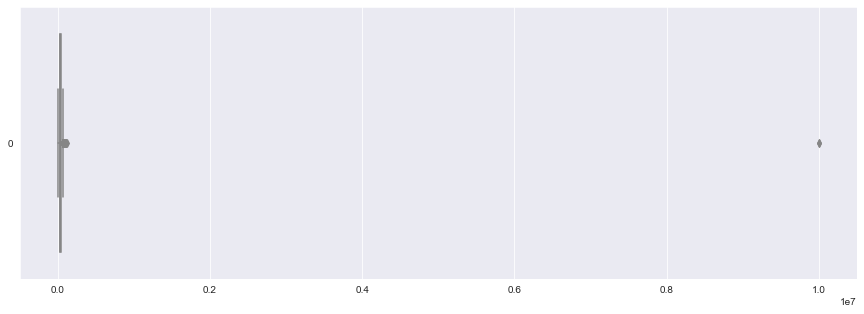

In [18]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,5))
sns.boxplot(data=df.Salary,orient="h",color="pink")

In [19]:
from matplotlib.cbook import boxplot_stats

filter_data = df.Salary[~np.isnan(df.Salary)] # I have to fliter NaN values before we use the boxplot_stats
stats = boxplot_stats(filter_data)
stats

[{'mean': 34697.94998545485,
  'iqr': 19500.0,
  'cilo': 30860.445327978665,
  'cihi': 31139.554672021335,
  'whishi': 71500.0,
  'whislo': 0.0,
  'fliers': array([75000., 90000., 96000., ..., 93600., 80000., 90000.]),
  'q1': 23000.0,
  'med': 31000.0,
  'q3': 42500.0}]

### ------> OBSERVATION
+ The 'fliers' are outliers. It seems they are having values of [75000., 90000., 96000., ..., 93600., 80000., 90000.].
+ I can see some an outlier values in `Salary`. Let's investigate them further to see if they are real outliers
+ I replace walue which **greater than or equal to 10000000.0** because there is still a great gap between two distintive outlier. This is because the value is rare. We will replace the value with median because we do not want the graph to be too much skew.

In [20]:
df[(df.Salary <= 0)].head(3)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
12082,69043447,Android Developer Digital Media City London,London,Evolution Recruitment Solutions,,permanent,IT Jobs,0.0,2012-08-07 12:00:00,2012-10-06 12:00:00,cwjobs.co.uk
12084,70175965,Digital Delivery Usability and Accessibility M...,UK,Skills Funding Agency,,permanent,IT Jobs,0.0,2013-10-26 15:00:00,2014-01-24 15:00:00,cwjobs.co.uk
12098,66403563,Senior Java Developer ServerSide,Newbury,RICHARD WHEELER ASSOCIATES,,permanent,IT Jobs,0.0,2013-01-14 12:00:00,2013-02-13 12:00:00,cwjobs.co.uk


In [21]:
df.loc[df.Salary <= 0].Salary.value_counts()

0.0    330
Name: Salary, dtype: int64

In [22]:
df[(df.Salary >= 10000000.0)]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
28725,58532963,Mobile Applications Developer,Cheshire,European Recruitment,-,permanent,IT Jobs,10000000.0,2013-06-26,2013-08-25,planetrecruit.com
31452,70013255,Registered General Nurse London,London,Appoint Group,-,,Healthcare & Nursing Jobs,10000000.0,2013-03-11,2013-05-10,staffnurse.com


In [23]:
df.loc[df.Salary >= 10000000.0].Salary.value_counts()

10000000.0    2
Name: Salary, dtype: int64

### -----> OBSERVATION:

+ Interestingly, there **330 observations** with 0 salary. Since we dont really have a value to indicates these jobs are volunteer, I will convert 0 to the median by location of the job

+ Furthermore, 2 jobs with more than 10000000.0 annually might 

In [24]:
df['Salary'].groupby(df['Location']).describe().T

Location,ABERDEEN,Aberdeen,Aberdeenshire,Abingdon,Accrington,Addlestone,Alcester,Aldershot,Alfreton,Alton,...,Worcestershire,Workington,Worksop,Worthing,Wrexham,Yeovil,York,Yorkshire and Humberside,birmingham,london
count,1.0,253.000000,32.000000,63.000000,18.000000,12.000000,10.000000,15.000000,17.000000,11.000000,...,49.000000,12.00000,13.000000,59.000000,19.000000,35.000000,180.000000,132.000000,2.000000,1.0
mean,32500.0,33719.494071,37451.593750,37570.365079,34639.944444,36729.000000,29862.400000,25592.666667,30617.764706,31445.454545,...,32283.040816,34788.50000,30338.461538,35389.457627,30593.368421,28256.428571,30860.211111,37157.159091,37500.000000,25800.0
std,NaN,15094.984534,17470.702739,17840.406256,17951.246689,16592.864896,10782.036287,10695.991550,16757.063408,11716.928235,...,15241.841353,20206.93527,15968.547881,18533.270586,14048.766495,11811.307542,15251.784913,17102.687933,3535.533906,NaN
min,32500.0,5088.000000,13440.000000,6000.000000,5472.000000,19000.000000,12840.000000,9600.000000,12345.000000,16000.000000,...,12550.000000,8533.00000,13708.000000,6000.000000,11884.000000,11884.000000,0.000000,0.000000,35000.000000,25800.0
25%,32500.0,22500.000000,26125.000000,24800.000000,20250.000000,29000.000000,20875.000000,18500.000000,19500.000000,22000.000000,...,22000.000000,23983.75000,16000.000000,21000.000000,23480.000000,18500.000000,21000.000000,25000.000000,36250.000000,25800.0
50%,32500.0,30000.000000,31000.000000,32000.000000,30503.000000,32500.000000,30360.000000,22500.000000,26500.000000,30000.000000,...,28000.000000,32000.00000,27000.000000,30000.000000,27500.000000,26500.000000,27250.000000,35000.000000,37500.000000,25800.0
75%,32500.0,42500.000000,48500.000000,49647.000000,49500.000000,38925.000000,39375.000000,29900.000000,34999.000000,39000.000000,...,40000.000000,37248.50000,42432.000000,46050.000000,34070.000000,35260.000000,37455.000000,42675.000000,38750.000000,25800.0
max,32500.0,84000.000000,90000.000000,95000.000000,67500.000000,83880.000000,43500.000000,50000.000000,80000.000000,49920.000000,...,90000.000000,90000.00000,60000.000000,85000.000000,72500.000000,55000.000000,95000.000000,90000.000000,40000.000000,25800.0


In [25]:
df[df['Salary'].isnull()].Location.value_counts()

UK                        413
London                    309
South East London         133
The City                   61
Manchester                 44
                         ... 
St. Neots                   1
Letchworth Garden City      1
Richmond                    1
Haywards Heath              1
Rochdale                    1
Name: Location, Length: 373, dtype: int64

In [26]:
condition = (df['Salary'] >= 10000000.0) | (df['Salary'] <= 0)
applies_indices = indices[condition]
applies_indices

Int64Index([12082, 12084, 12098, 12148, 12155, 12204, 12210, 12213, 12234,
            12244,
            ...
            47833, 48314, 48350, 48389, 49762, 49769, 49811, 50139, 50143,
            50166],
           dtype='int64', length=332)

In [27]:
# update error_list
for ind in applies_indices:
    update_error_list(ind, df.loc[ind,'Id'], 'Salary', df.loc[ind,'Salary'], 'NaN', 'Outliers',"Change to null") 
error_list

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
0,14577,71198154,OpenDate,20132309T000000,20130923T000000,Wrong Date Format,Change the location of day and month
1,All,All,All,NA,NA,Parse all columns into requuired format,"Convert to appropriate int, float, and datetim..."
2,12082,69043447,Salary,0.0,NaN,Outliers,Change to null
3,12084,70175965,Salary,0.0,NaN,Outliers,Change to null
4,12098,66403563,Salary,0.0,NaN,Outliers,Change to null
...,...,...,...,...,...,...,...
329,49769,67802688,Salary,0.0,NaN,Outliers,Change to null
330,49811,67804100,Salary,0.0,NaN,Outliers,Change to null
331,50139,71292058,Salary,0.0,NaN,Outliers,Change to null
332,50143,67774760,Salary,0.0,NaN,Outliers,Change to null


In [28]:
# covert outliers to Null values
df.loc[condition,"Salary"] = np.nan

### Impute missing value in numerical column

In [29]:
df['Salary_filled'] = df['Salary'].fillna(df.groupby("Location")["Salary"].transform("median"))
df.Salary_filled.describe()

count     50753.000000
mean      34331.278309
std       15520.894623
min        5000.000000
25%       23500.000000
50%       31500.000000
75%       42000.000000
max      116951.000000
Name: Salary_filled, dtype: float64

In [30]:
# retrive the indices 
condition = df['Salary'].isnull()
applies_indices = indices[condition]

# update erlist
for ind in applies_indices:
    update_error_list(ind, df.loc[ind,'Id'], 'Salary', 'NaN', df.loc[ind,'Salary_filled'], 'Missing Value',"Imputed with the median value of the corresponding `Location` group.")

error_list.tail(3)

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
3290,50750,69090081,Salary,NaN,35000.0,Missing Value,Imputed with the median value of the correspon...
3291,50751,70139229,Salary,NaN,31500.0,Missing Value,Imputed with the median value of the correspon...
3292,50752,66372417,Salary,NaN,32500.0,Missing Value,Imputed with the median value of the correspon...


In [31]:
# Drop the Salary column and change the age_filled column to age 
df.drop('Salary', axis=1, inplace=True)
df.rename(columns={'Salary_filled': 'Salary'}, inplace=True)
df.head(3)

,Id,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,SourceName,Salary
0,67378957,"Pastry Sous Chef, Five Star Hotel",South East London,SpaYse,-,-,Hospitality & Catering Jobs,2012-08-22 00:00:00,2012-10-21 00:00:00,caterer.com,35000.0
1,69470006,Deputy Manager Leicester,Leicester,Cherryred Recruitment,-,-,Hospitality & Catering Jobs,2012-10-23 15:00:00,2012-11-06 15:00:00,caterer.com,26000.0
2,70146250,General Manager Brighton Nightclub,Brighton,"Appetite4Recruitment High End Restaurants, P...",-,-,Hospitality & Catering Jobs,2013-10-22 15:00:00,2013-12-21 15:00:00,caterer.com,31000.0


<AxesSubplot:>

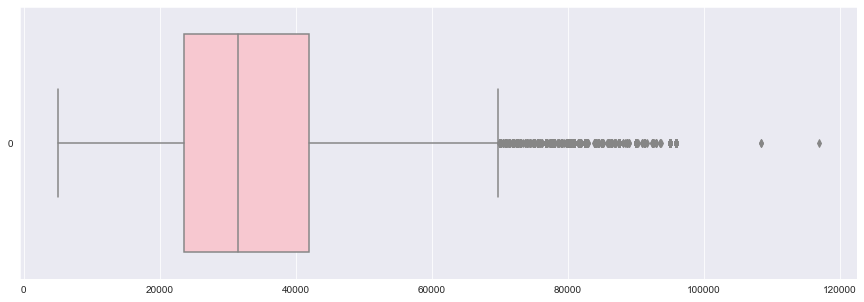

In [32]:
# boxplot after removing outliers
plt.figure(figsize= (15,5))
sns.boxplot(data=df.Salary,orient="h",color="pink")

# Inconsistency
### Lower Case the content & Remove extra whitespace of the content
+ Convert all the string values in the categorical column to lowercase to keep all the string uniformly format to perform any function related to the string.
+ XML does not truncate multiple white-spaces (HTML truncates multiple white-spaces to one single white-space)

In [33]:
# select non-numeric columns
df_string = ['Title', 'Location', 'Company', 'ContractType', 'ContractTime', 'Category', 'SourceName']
        
update_error_list('All', 'All', df_string, 'Capitalize words, leading and trailing spaces', 'lowercase all, no extra spaces', 'Syntax Errors', 'Convert all the string values to lowercase and remove leading, trailiing spaces') 

# convert all string to lowercase and strip trailing and leading spaces
df = df.convert_dtypes().applymap(lambda s: s.lower().strip() if type(s) == str else s)  

error_list.tail(3)

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
3291,50751,70139229,Salary,NaN,31500.0,Missing Value,Imputed with the median value of the correspon...
3292,50752,66372417,Salary,NaN,32500.0,Missing Value,Imputed with the median value of the correspon...
3293,All,All,"[Title, Location, Company, ContractType, Contr...","Capitalize words, leading and trailing spaces","lowercase all, no extra spaces",Syntax Errors,Convert all the string values to lowercase and...


In [34]:
# There are 8 categories which satisfied the requirement
print(f'NUMBER OF CATEGORIES: {df.Category.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Category.unique()}\n\n\n')

NUMBER OF CATEGORIES: 8; 

UNIQUE NAMES OF THE CATEGORIES ['hospitality & catering jobs' 'sales jobs' 'accounting & finance jobs'
 'engineering jobs' 'pr, advertising & marketing jobs' 'it jobs'
 'teaching jobs' 'healthcare & nursing jobs']





In [35]:
print(f'NUMBER OF CATEGORIES: {df.Title.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Title.value_counts()}\n')

NUMBER OF CATEGORIES: 50749; 

UNIQUE NAMES OF THE CATEGORIES quality assurance/software testers                  2
optometrist  4 days a week                          2
lecturer b (business & law)                         2
planning policy & economic development manager      2
pastry sous chef, five star hotel                   1
                                                   ..
water hygiene fitter / plumber  hampshire           1
ta administrator – service delivery support         1
global risk director of hr                          1
senior change consultant  retail pricing  london    1
graduate engineer (water industry)                  1
Name: Title, Length: 50749, dtype: int64



In [36]:
print(f'NUMBER OF CATEGORIES: {df.Location.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Location.value_counts()}\n')

NUMBER OF CATEGORIES: 488; 

UNIQUE NAMES OF THE CATEGORIES uk                   7700
london               6563
south east london    2728
the city             1165
central london        825
                     ... 
cembridge               2
londn                   2
leads                   1
warringtn               1
livepool                1
Name: Location, Length: 488, dtype: int64



### Replace the values with the same meaning and different names
I am not that familiar with the suburb names, so I'll find the best matching suburb names using the `difflib` library.

In [37]:
import difflib

# finding the best match from the rest of all suburb names, with a specific threshold .85
# you can gradually lower the threshod if there is no matching
difflib.get_close_matches('londn',set(df['Location']).difference(['londn']), n = 1,cutoff=0.85) 

['london']

In [38]:
difflib.get_close_matches('hampshira',set(df['Location']).difference(['hampshira']), n = 1,cutoff=0.8) 

['hampshire']

In [39]:
difflib.get_close_matches('oxfords',set(df['Location']).difference(['oxfords']), n = 1,cutoff=0.8) 

['oxford']

In [40]:
difflib.get_close_matches('croydan',set(df['Location']).difference(['croydan']), n = 1,cutoff=0.8) 

['croydon']

In [41]:
difflib.get_close_matches('manchaster',set(df['Location']).difference(['manchaster']), n = 1,cutoff=0.8) 

['manchester']

In [42]:
difflib.get_close_matches('cembridge',set(df['Location']).difference(['cembridge']), n = 1,cutoff=0.8) 

['cambridge']

In [43]:
difflib.get_close_matches('leads',set(df['Location']).difference(['leads']), n = 1,cutoff=0.8) 

['leeds']

In [44]:
difflib.get_close_matches('warringtn',set(df['Location']).difference(['warringtn']), n = 1,cutoff=0.8) 

['warrington']

In [45]:
difflib.get_close_matches('livepool',set(df['Location']).difference(['livepool']), n = 1,cutoff=0.8) 

['liverpool']

In [46]:
replace_dict = {'londn':'london', 'cembridge':'cambridge', 'hampshira':'hampshire', 'oxfords':'oxford', 
                'leads':'leeds', 'warringtn':'warrington','livepool':'liverpool', 'croydan':'croydon', 
                'manchaster':'manchester'}

conditions = {key:df.Location == key for key in replace_dict.keys()} # conditions share the same key set as in replace_dict

for key in conditions.keys():
    applies_indices = indices[conditions[key]]
    # update erlist
    for ind in applies_indices:
        update_error_list(ind, df.loc[ind,'Id'], 'Location', key, replace_dict[key], 'Misspelling',"Change typo")
        
error_list.tail(3)

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
3306,27779,70205501,Location,croydan,croydon,Misspelling,Change typo
3307,34598,68544641,Location,manchaster,manchester,Misspelling,Change typo
3308,35912,69164026,Location,manchaster,manchester,Misspelling,Change typo


In [47]:
# Replace values in location
df.Location.replace(replace_dict,inplace=True)
print(f'NUMBER OF CATEGORIES: {df.Location.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Location.value_counts()}\n')

NUMBER OF CATEGORIES: 479; 

UNIQUE NAMES OF THE CATEGORIES uk                    7700
london                6565
south east london     2728
the city              1165
central london         825
                      ... 
canary wharf             9
st. neots                8
sutton-in-ashfield       7
south brent              7
north finchley           5
Name: Location, Length: 479, dtype: int64



In [48]:
print(f'NUMBER OF CATEGORIES: {df.ContractTime.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.ContractTime.unique()}\n\n\n')

NUMBER OF CATEGORIES: 5; 

UNIQUE NAMES OF THE CATEGORIES ['-' 'permanent' 'contract' '' 'n/a' <NA>]





In [49]:
condition = (df['ContractTime'] == '-') | (df['ContractTime'] == 'n/a') | (df['ContractTime'] == '') 
applies_indices = indices[condition]

# update erlist
for ind in applies_indices:
    update_error_list(ind, df.loc[ind,'Id'], 'ContractTime', df.loc[ind,'ContractTime'], 'non-specified', 'Inconsistency',"Replace with 'non-specified' value")

error_list.tail(3)

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
15737,49011,69733658,ContractTime,n/a,non-specified,Inconsistency,Replace with 'non-specified' value
15738,49012,68844789,ContractTime,n/a,non-specified,Inconsistency,Replace with 'non-specified' value
15739,49039,69733905,ContractTime,-,non-specified,Inconsistency,Replace with 'non-specified' value


In [50]:
df.loc[df['ContractTime'] == '-', "ContractTime"] = "non-specified" # replacing all '-' with 'non-specified'
df.loc[df['ContractTime'] == 'n/a', "ContractTime"] = "non-specified" # replacing all 'n/a' with 'non-specified'
df.loc[df['ContractTime'] == '', "ContractTime"] = "non-specified" # replacing all ' ' with 'non-specified'

# double check
print(f'NUMBER OF CATEGORIES: {df.ContractTime.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.ContractTime.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['non-specified' 'permanent' 'contract' <NA>]





In [51]:
print(f'NUMBER OF CATEGORIES: {df.ContractType.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.ContractType.unique()}\n\n\n')

NUMBER OF CATEGORIES: 5; 

UNIQUE NAMES OF THE CATEGORIES ['-' 'part_time' 'full_time' '' 'n/a' <NA>]





### ------> OBSERVATION

`ContractType` has the same problem as `ContractTime`, I'll do the same steps above in a code block

In [52]:
condition = (df['ContractType'] == '-') | (df['ContractType'] == 'n/a') | (df['ContractType'] == '') 
applies_indices = indices[condition]

# update erlist
for ind in applies_indices:
    update_error_list(ind, df.loc[ind,'Id'], 'ContractType', df.loc[ind,'ContractType'], 'non-specified', 'Inconsistency',"Replace with 'non-specified' value")

df.loc[df['ContractType'] == '-', "ContractType"] = "non-specified" # replacing all '-' with 'non-specified'
df.loc[df['ContractType'] == 'n/a', "ContractType"] = "non-specified" # replacing all 'n/a' with 'non-specified'
df.loc[df['ContractType'] == '', "ContractType"] = "non-specified" # replacing all '' with 'non-specified'

print(f'NUMBER OF CATEGORIES: {df.ContractType.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.ContractType.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['non-specified' 'part_time' 'full_time' <NA>]





# Check & Impute missing values
+ Print out number and percentage of missing value in each column
+ Visualize present and absent value using `missingno` library

Missing values in the dataframe in descending: 
               Total  Percent
ContractType  10632    20.95
ContractTime   1703     3.36
Company         873     1.72


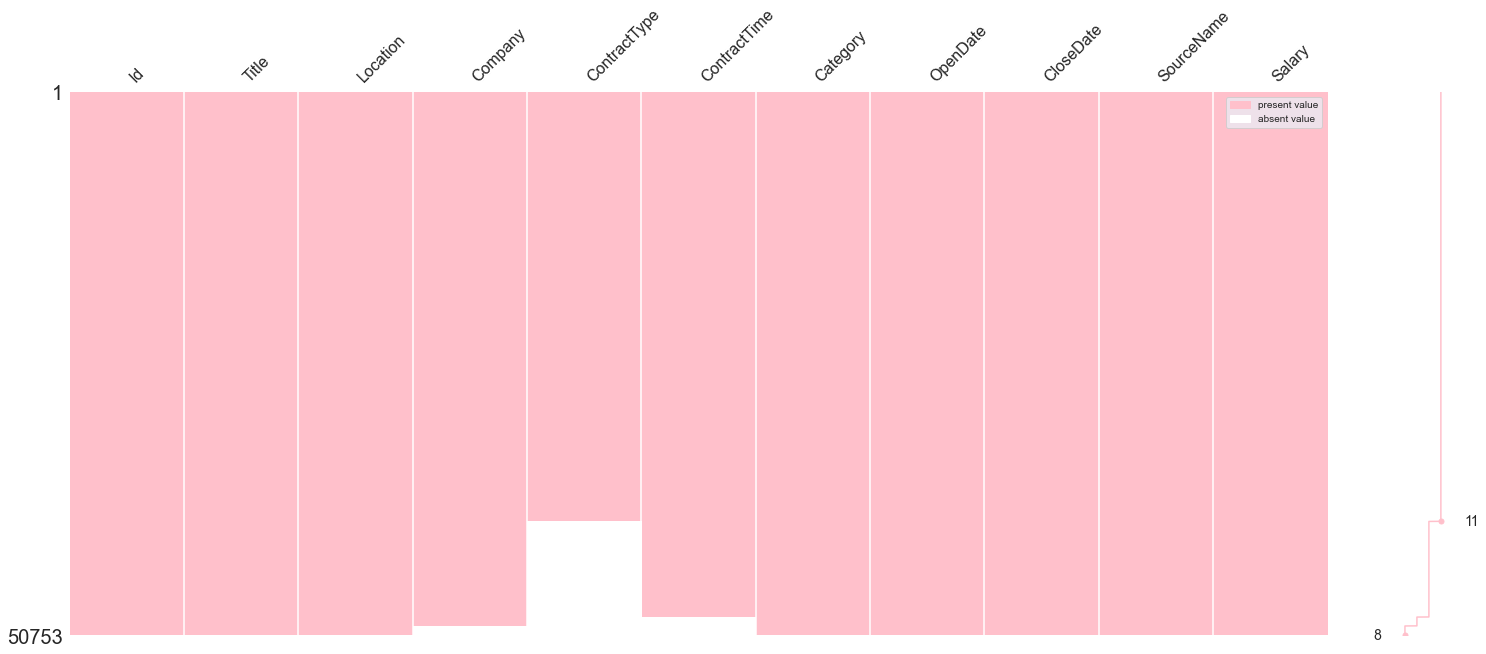

In [53]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.savefig('missing_plot.png')
plt.show()

### Impute missing values in categorical columns with a default value 
According to the requirement, for unknown values for these columns: `Title`, `Location`, `Company`, `ContractType`, `ContractTime`, `SourceName`, I fill with `non-specified`

In [54]:
# fill the missing value for some columns by 'non-specified'
missing_categorical_columns = ['Title', 'Location', 'Company', 'ContractType', 'ContractTime', 'SourceName']

# loop through missing categorical columns and impute with 'non-specified' and update error list
for col in missing_categorical_columns:
    condition = df[col].isnull()
    applies_indices = indices[condition]
    df[col].fillna('non-specified', inplace=True)
    for ind in applies_indices:
        update_error_list(ind, df.loc[ind,'Id'], col, 'NaN', df.loc[ind,col],'Missing Value',"Imputed with 'non-specified'.")

error_list.tail(3)

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
56382,50750,69090081,ContractTime,NaN,non-specified,Missing Value,Imputed with 'non-specified'.
56383,50751,70139229,ContractTime,NaN,non-specified,Missing Value,Imputed with 'non-specified'.
56384,50752,66372417,ContractTime,NaN,non-specified,Missing Value,Imputed with 'non-specified'.


### Check duplication

+ Since a job position can be posted on different sources, we need to check the duplication in our dataset. Moreover, human error also plays an important factor

+ By reading the dataset description, we can assume that the `CloseDate`, `Title`, `Location`, `Company`, `ContractType`, and `ContractTime` can uniquely identify a job position, we can then use these values to check whether or not the dataset contains duplicated records.

In [55]:
condition = df.duplicated(['Location','Company','ContractType','ContractTime','Category','CloseDate','Salary'], keep=False)
# see the duplicated rows with the condition above
df[condition]

,Id,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,SourceName,Salary
10905,72549907,senior java expert gaming,london,aston carter,non-specified,permanent,it jobs,2012-10-30 12:00:00,2013-01-28 12:00:00,cwjobs.co.uk,45000.0
11334,69039803,hadoop developer software house london,london,aston carter,non-specified,permanent,it jobs,2012-11-29 12:00:00,2013-01-28 12:00:00,cwjobs.co.uk,45000.0
50535,67784892,planning policy & economic development manager,uk,non-specified,non-specified,non-specified,engineering jobs,2012-11-28 12:00:00,2013-01-27 12:00:00,jobs.planningresource.co.uk,31500.0
50549,71805379,planning policy & economic development manager,uk,non-specified,non-specified,non-specified,engineering jobs,2012-11-28 12:00:00,2013-01-27 12:00:00,jobs.planningresource.co.uk,31500.0


### -----> OBSERVATION

+ These 2 group data entries are almost the same! Except that the `Id` (uniquely identify the rows of records) values are different. Therefore, let's keep the first one:

In [56]:
# we will keep the first one and discard the second
ind = 50549
update_error_list(ind, df.loc[ind,'Id'], 'ALL', 'NA', 'NA', 'Duplicates',"Removed") 
ind = 1134
update_error_list(ind, df.loc[ind,'Id'], 'ALL', 'NA', 'NA', 'Duplicates',"Removed") 
error_list.tail(3)

,indexOfdf,Id,ColumnName,Original,Modified,ErrorType,Fixing
56384,50752,66372417,ContractTime,NaN,non-specified,Missing Value,Imputed with 'non-specified'.
56385,50549,71805379,ALL,NA,NA,Duplicates,Removed
56386,1134,69896000,ALL,NA,NA,Duplicates,Removed


In [57]:
# drop duplicate and keep the first instance
df.drop_duplicates(['Location','Company','ContractType','ContractTime','Category','CloseDate','Salary'], keep='first', inplace=True)

# double check!
condition = df.duplicated(['Location','Company','ContractType','ContractTime','Category','CloseDate','Salary'], keep=False)
df[condition]

,Id,Title,Location,Company,ContractType,ContractTime,Category,OpenDate,CloseDate,SourceName,Salary


# Saving data
Save the parsed and cleaned data as well as the error list, named as:

> dataset1_solution.csv

> error_list.csv



In [58]:
# code to save output data

# names of the saved files
csv_error_list = 'error_list.csv'
csv_solution = 'dataset1_solution.csv'

# To write the data from data frame into a CSV file, use the to_csv function.
df.to_csv(csv_solution, index=False)
error_list.to_csv(csv_error_list, index=False)

# print out the success message
print(f'Saved the error list {csv_error_list} and the cleaned data {csv_solution}\n as CSV files successfully!\n\n')

Saved the error list error_list.csv and the cleaned data dataset1_solution.csv
 as CSV files successfully!




<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h3>

+ I learned the tree structure in XML file and how to parse it in Python dataframe properly

+ I performed preprocessing Syntactical, Semantic, and Coverage Anomalies in the dataset

+ I learned how to programmatically record errors into a file

+ I did not use advanced missing value imputation (a linear model) to predict the Salary because the dataset does not contain that many numerical columns (in fact, only Id is numeric beside our target variable). Unfortunately, Id does not act as a meaningful metric to predict Salary. Additionally, categorical columns also are the input of the model, but I need to encode the attribute first (which is beyond the scope of the assignment)

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>References</strong></h3>

+ [Concatenate pandas objects](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
+ [Drop duplications](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)
+ [Visualize missing values](https://github.com/ResidentMario/missingno)